<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/jura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tpot

import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=62d5a04a663e1e8da946162479365e04337e19cb29fae982545d60820c7aebbb
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [2]:
from tpot import TPOTRegressor

In [3]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-jura.csv to csv_result-jura.csv


In [4]:
import pandas as pd
df = pd.read_csv("csv_result-jura.csv")
df.head()
y_col = [
'Cd',
'Cu',
'Pb',
# 'Y4',
# 'Y5',
# 'Y6'
]
y = df[y_col]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
X = df[df.columns.drop(y)]
#X=df.drop(columns=['Cd','Cu','Pb'])
y.head()


,Cd,Cu,Pb
0,1.740,25.72,77.36
1,1.335,24.76,77.88
2,1.610,8.88,30.80
3,2.150,22.70,56.40
4,1.565,34.32,66.40


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
# Initialize the scaler
#scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)
#X_train = X_train_normalized
#X_test = X_test_normalized
# Normalize the target values (y)
#scaler_y = StandardScaler()
#y_train_scaled = scaler_y.fit_transform(y_train)
#y_test_scaled = scaler_y.transform(y_test)
#y_train = y_train_scaled
#y_test = y_test_scaled
#below is to do a robust scaler to X and y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply robust scaling to the input features (X)
robust_scaler_X = RobustScaler()
X_train_scaled = robust_scaler_X.fit_transform(X_train)
X_test_scaled = robust_scaler_X.transform(X_test)
# Apply robust scaling to the target features (y)
robust_scaler_y = RobustScaler()
#y_train_scaled = robust_scaler_y.fit_transform(y_train)
#y_test_scaled = robust_scaler_y.transform(y_test)
# Normalize the input features (X)
#scaler_X = StandardScaler()
#X_train_scaled = scaler_X.fit_transform(X_train)
#X_test_scaled = scaler_X.transform(X_test)
# Normalize the target values (y)
#scaler_y = StandardScaler()
#y_train_scaled = scaler_y.fit_transform(y_train)
#y_test_scaled = scaler_y.transform(y_test)
# Use MinMaxScaler for the input features (X)
#scaler_X = MinMaxScaler()
#X_train_scaled = scaler_X.fit_transform(X_train)
#X_test_scaled = scaler_X.transform(X_test)
# Use PolynomialFeatures for the input features (X)
#degree = 2 # You can adjust the degree of the polynomial
#poly_features = PolynomialFeatures(degree=degree, include_bias=False)
#X_train_poly = poly_features.fit_transform(X_train)
#X_test_poly = poly_features.transform(X_test)
# Use PowerTransformer for the input features (X)
#power_transformer_X = PowerTransformer()
#X_train_scaled = power_transformer_X.fit_transform(X_train)
#X_test_scaled = power_transformer_X.transform(X_test)
# Initialize the SimpleImputer
#imputer = SimpleImputer(strategy='mean') # You can use 'mean', 'median', 'most_frequent', or a constant value
# Fit and transform the imputer on the training data
#X_train_imputed = imputer.fit_transform(X_train)
# Transform the test data using the imputer
#X_test_imputed = imputer.transform(X_test)
#y_train_imputed = imputer.fit_transform(y_train)
#y_test_imputed = imputer.transform(y_test)
# Inverse transform the predicted values to get them back to the original scale
#y_pred = scaler_y.inverse_transform(y_pred_scaled)
from sklearn.preprocessing import QuantileTransformer
# Initialize the QuantileTransformer
# Initialize the QuantileTransformer
#quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=123,n_quantiles=287 ) # You can choose 'uniform'
# Fit the transformer on X_train and transform X_train
#X_train_transformed = quantile_transformer.fit_transform(X_train)
# Transform X_test using the same transformer
#X_test_transformed = quantile_transformer.transform(X_test)
# If you want to inverse transform the data back to the original scale:
#X_original = scaler.inverse_transform(X_scaled)
#X_train = X_train_transformed
#X_test = X_test_transformed
X_train = X_train_scaled
X_test = X_test_scaled
#y_train = y_train_scaled
#y_test = y_test_scaled


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=1, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10))
#rfg = MultiOutputRegressor(LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000))
#from sklearn.decomposition import PCA, KernelPCA
#pca = PCA(n_components=2)
#pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
#pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
#X_train1 = pca.fit_transform(X_train)
# transform features of the test set
#X_test1 = pca.transform(X_test)
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)




Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3590860624609973

Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -272.86263815128973

Best pipeline: LassoLarsCV(PolynomialFeatures(SelectFwe(input_matrix, alpha=0.02), degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -514.6952926005034

Best pipeline: ExtraTreesRegressor(ZeroCount(ZeroCount(input_matrix)), bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


0.49119759076700736

In [7]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_mse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)
morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse1 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse1)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 14.640805456220683
MAE for morrfr is 8.034082366969002
mean_test_values: Cd     1.424722
Cu    21.862222
Pb    56.286111
dtype: float64
RMSE: 14.640805456220683
Relative RMSE: Cd    10.276253
Cu     0.669685
Pb     0.260114
dtype: float64
arrmse: 3.735350585037544
Percentage arrmse = 373.54%
rmse_per_output: [ 0.53206281 12.73363604 21.92329756]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


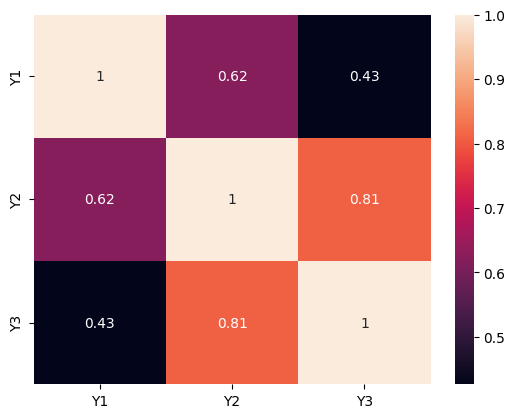

In [8]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2]).fit(X_train, y_train)
#chain.fit(X_train, y_train)
y_pred2 = chain.predict(X_test)
chain.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.45819506954443484

In [10]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse2=math.sqrt(morrfr_mse(y_test, y_pred2))
print('RMSE for morrfr is',morrfr_rmse2)
morrfr_mae2=morrfr_mae(y_test, y_pred2)
print('MAE for morrfr is',morrfr_mae2)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse2 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse2)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 15.869107286714957
MAE for morrfr is 8.016892290783636
mean_test_values: Cd     1.424722
Cu    21.862222
Pb    56.286111
dtype: float64
RMSE: 15.869107286714957
Relative RMSE: Cd    11.138387
Cu     0.725869
Pb     0.281936
dtype: float64
arrmse: 4.048730745361308
Percentage arrmse = 404.87%
rmse_per_output: [ 0.56111647 11.68372761 24.87290405]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


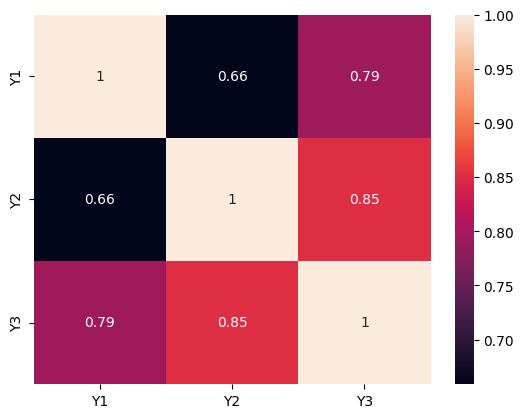

In [11]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [6]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    i = 0
    for i in range(yy):

      reg = TPOTRegressor(generations=1, population_size=50,verbosity=2, random_state=123, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')

      Xi = np.column_stack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))
    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.column_stack([X, y[:, :i]]))
    return y


In [7]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(10).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3590860624609973

Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -240.845487067228

Best pipeline: RidgeCV(CombineDFs(input_matrix, input_matrix))


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -289.64677271978053

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.35000000000000003, verbosity=0)


In [8]:
Ypred2 = reg2.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.46663834137873544


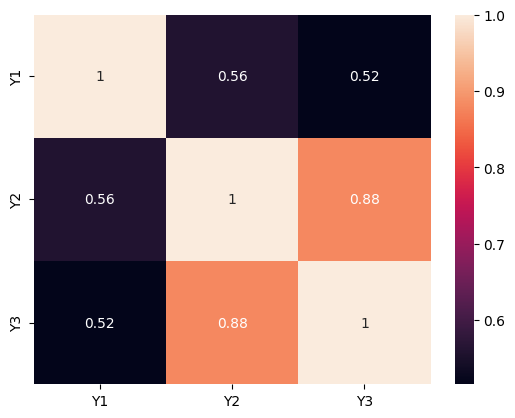

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test, Ypred2))
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = rmse / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("RMSE:", rmse)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")

import numpy as np
def calculate_rrmse(y_test, Ypred2):
# Calculate RMSE
  rmse = np.sqrt(((y_test - Ypred2) ** 2).mean())
# Calculate the range of the data
  data_range = np.max(y_test) - np.min(y_test)

RMSE: 15.724607873735003
Relative RMSE: Cd    11.036964
Cu     0.719259
Pb     0.279369
dtype: float64
arrmse: 4.01186419669865
Percentage arrmse = 401.19%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
